### Ridge operators
[link to example](https://scikit-image.org/docs/stable/auto_examples/edges/plot_ridge_filter.html#sphx-glr-auto-examples-edges-plot-ridge-filter-py)

Ridge filters can be used to detect ridge-like structures, such as neurites, tubes, vessels, wrinkles or rivers.

Different ridge filters may be suited for detecting different structures, for example, depending on contrast or noise level.

The present class of ridge filters relies on eigenvalues of the Hessian matrix of image intensities to detect ridge structures where the intensity changes perpendicular but not along the structure.

Note that, due to edge effects, results for Meijering and Frangi filters are cropped by 4 pixels on each edge to get a proper rendering.

c:\Users\AdamSz\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


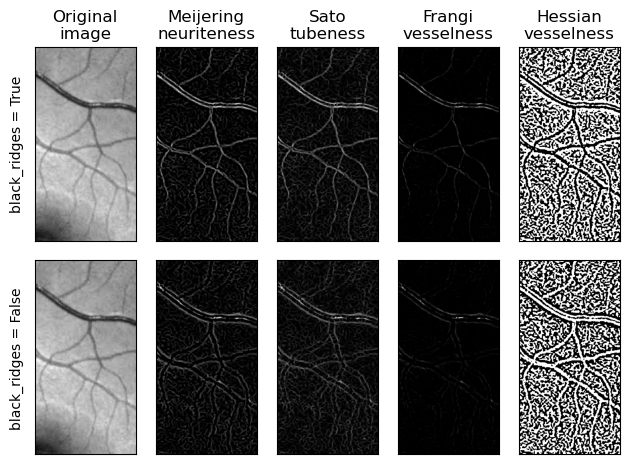

In [1]:
from skimage import data, color
from skimage.filters import meijering, sato, frangi, hessian
import matplotlib.pyplot as plt

def identity(image, **kwagrs):
    """Return original image, ignoring any kwargs"""
    return image

image = color.rgb2gray(data.retina())[300:700, 700:900]
kwargs = {'sigmas': [1], 'mode': 'reflect'}

fig, axes = plt.subplots(2, 5)
for i, black_ridges in enumerate([1, 0]):
    for j, func in enumerate([identity, meijering, sato, frangi, hessian]):
        kwargs['black_ridges'] = black_ridges
        result = func(image, **kwargs)
        axes[i, j].imshow(result, cmap=plt.cm.gray, aspect='auto')
        if i == 0:
            axes[i, j].set_title(
                ['Original\nimage', 'Meijering\nneuriteness', 'Sato\ntubeness',
                'Frangi\nvesselness', 'Hessian\nvesselness'][j])
        if j == 0:
            axes[i, j].set_ylabel(f'black_ridges = {str(bool(black_ridges))}')

        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])

plt.tight_layout()
plt.show()